In [ ]:
#data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

# Split the dataset
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store accuracies
accuracies = {}

# Train, predict, and evaluate each classifier
for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy for Each Classifier')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path ="Downloads/dermatology_database_1.csv" # Update if needed
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Handle missing values (Fill with mean for numerical columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables if any
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Separate features and target
df = df.iloc[:, 1:] 
X = df.iloc[:, :-1]  # All columns except the last one (assuming last column is target)
y = df.iloc[:, -1]   # Target column (Skin disease class)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nPreprocessing Completed!")
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence           

In [ ]:
#top 10 features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
c
# Load the dataset
file_path = "Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Handle missing values (Fill with mean for numerical columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Feature Selection using Random Forest ---------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf.feature_importances_

# Select top 10 important features
top_features_indices = np.argsort(feature_importances_rf)[-10:]  # Indices of top features
selected_features_rf = X.columns[top_features_indices]  # Get feature names

# Print selected features
print("\nTop 10 Important Features (Random Forest):")
print(selected_features_rf.tolist())

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



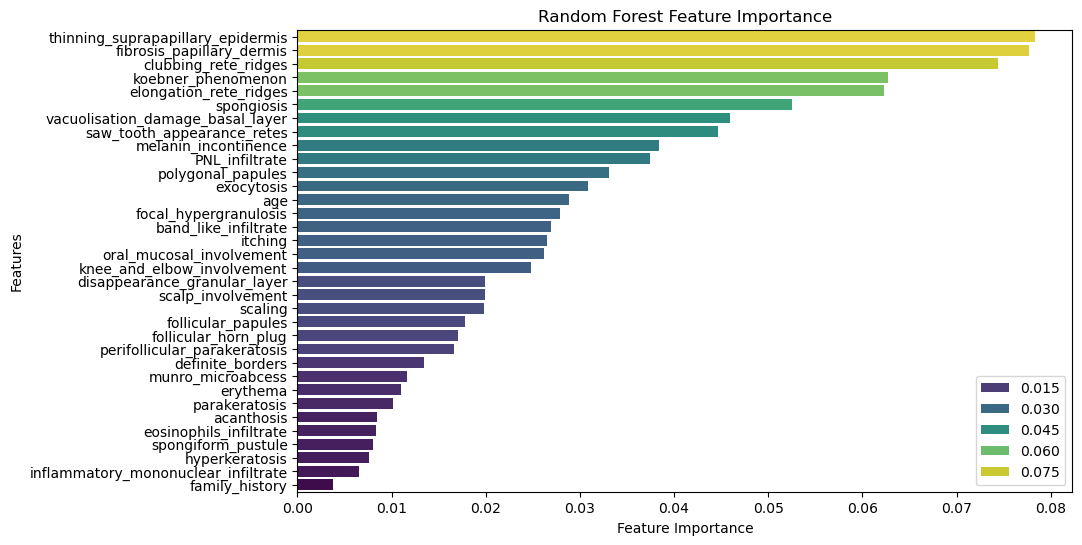

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('Downloads/dermatology_database_1.csv')

# Splitting dataset
X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target (last column)

# Handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Calculation
importance = np.abs(rf_model.feature_importances_)

# Sort feature importance
sorted_idx = np.argsort(importance)[::-1]

# Convert X.columns to a numpy array to prevent indexing issues
feature_names = np.array(X.columns)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], hue=importance[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
#random forest classifier feature Selection

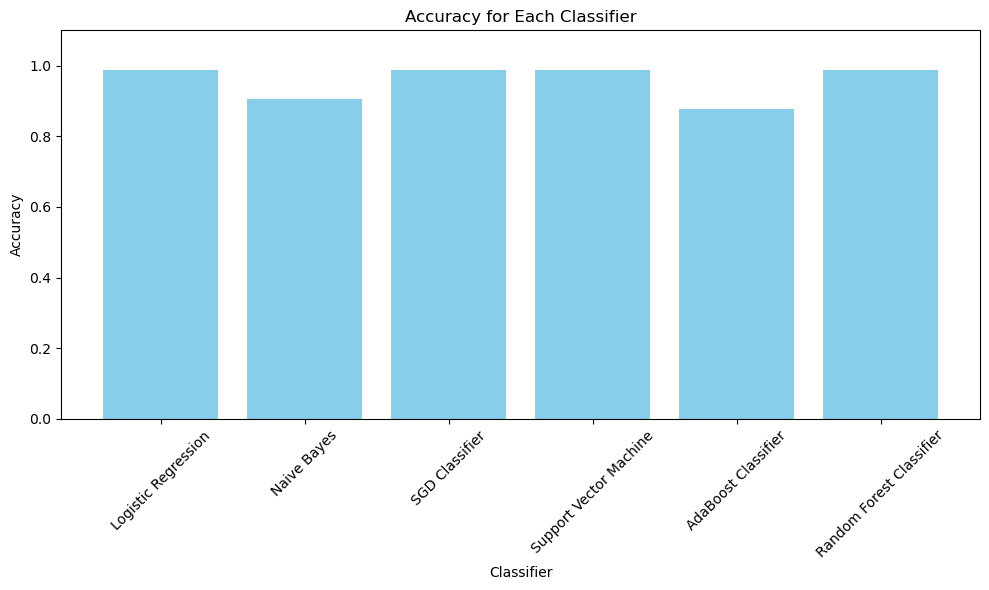

In [11]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

# Split the dataset
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators=100, algorithm='SAMME'),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store accuracies
accuracies = {}

# Train, predict, and evaluate each classifier
for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy for Each Classifier')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

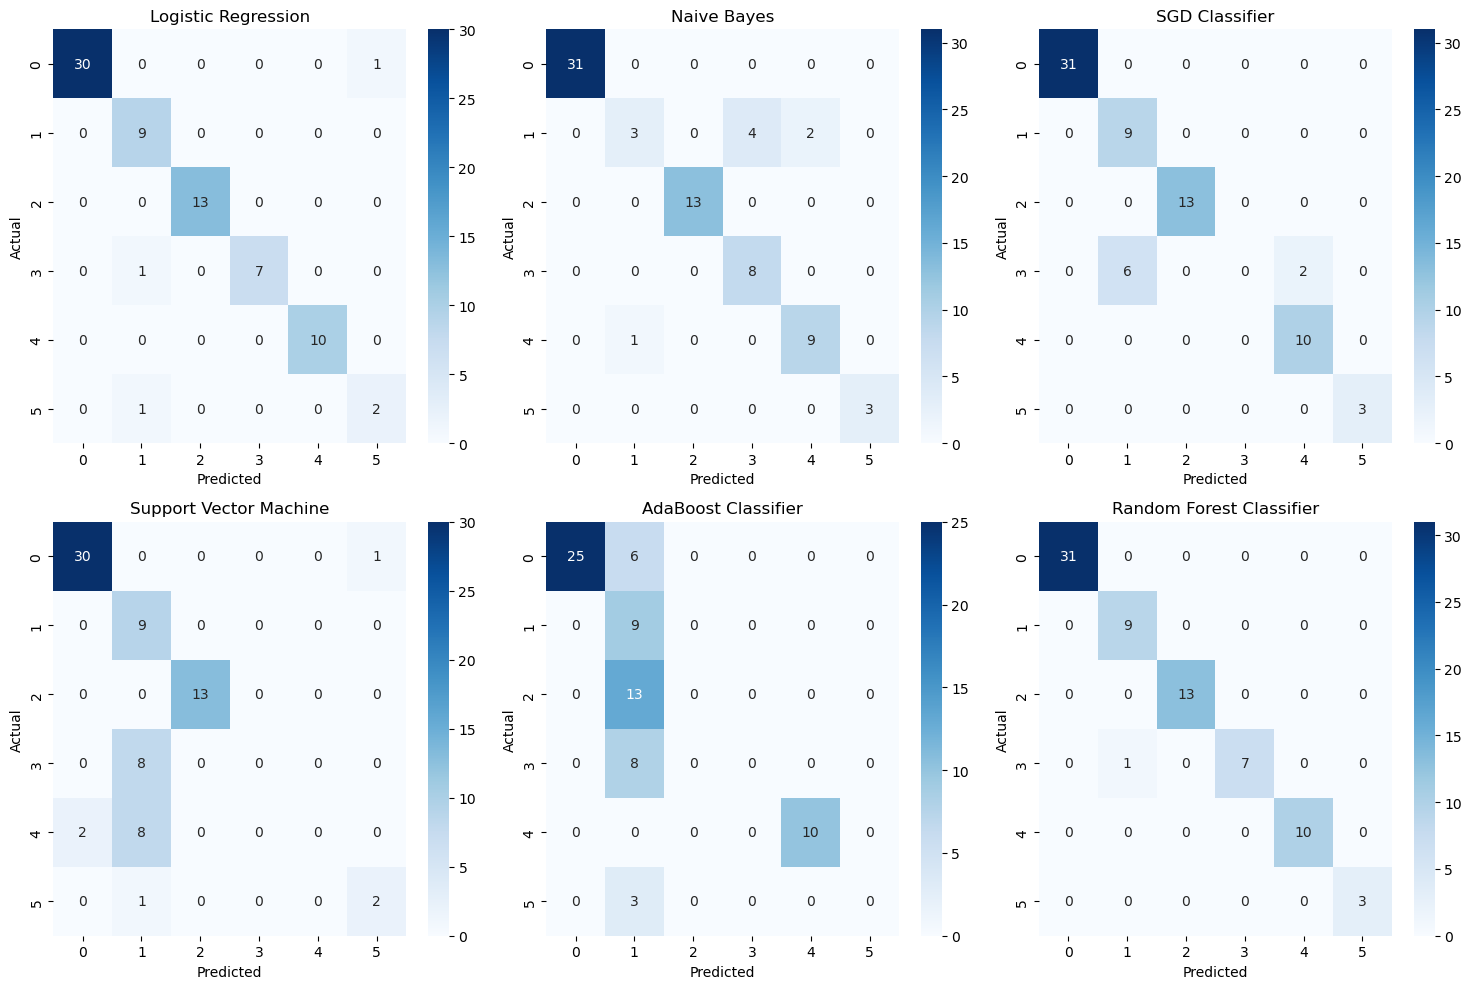

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# List of classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(algorithm='SAMME'),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plotting confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import pandas as pd

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'F1-score': [],
    'Precision': [],
    'Recall': []
}

# Classifiers
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Naive Bayes with RF Features': GaussianNB()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['F1-score'].append(round(f1_score(y_test, y_pred, average='weighted'), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred, average='weighted'), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred, average='weighted'), 4))

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          Model  Accuracy  F1-score  Precision  Recall
0                 Random Forest    0.9865    0.9864     0.9878  0.9865
1           Logistic Regression    0.9595    0.9602     0.9644  0.9595
2                SGD Classifier    0.8919    0.8492     0.8207  0.8919
3        Support Vector Machine    0.7297    0.6642     0.6375  0.7297
4                      AdaBoost    0.5946    0.5548     0.5821  0.5946
5  Naive Bayes with RF Features    0.9054    0.8936     0.9090  0.9054


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {
    'Model': [],
    'Accuracy': [],
    'F1-score': [],
    'Precision': [],
    'Recall': []
}

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm="SAMME"),
    'Naive Bayes with RF Features': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['F1-score'].append(round(f1_score(y_test, y_pred, average='weighted', zero_division=0), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred, average='weighted', zero_division=0), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred, average='weighted', zero_division=0), 4))

results_df = pd.DataFrame(results)
print(results_df)

                          Model  Accuracy  F1-score  Precision  Recall
0                 Random Forest    0.9865    0.9864     0.9878  0.9865
1           Logistic Regression    0.9595    0.9602     0.9644  0.9595
2                SGD Classifier    0.8919    0.8492     0.8207  0.8919
3        Support Vector Machine    0.7297    0.6642     0.6375  0.7297
4                      AdaBoost    0.5946    0.5548     0.5821  0.5946
5  Naive Bayes with RF Features    0.9054    0.8936     0.9090  0.9054


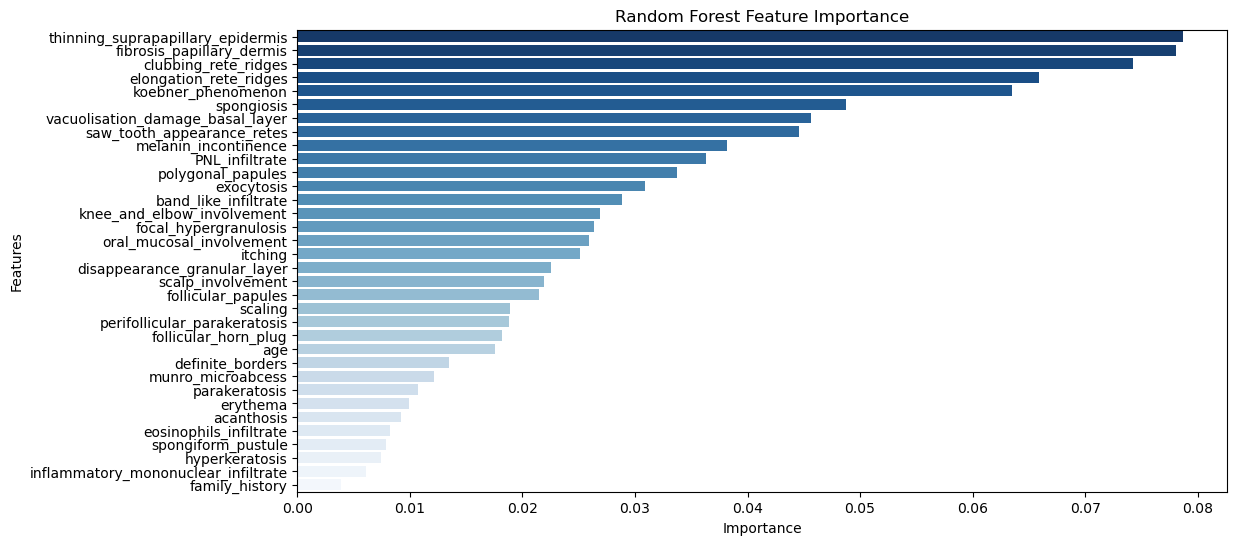

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load dataset
file_path = "Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train Random Forest Classifier ---------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# --------------------- Plot Feature Importance ---------------------
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Importance'], 
            y=feature_importance_df['Feature'], 
            hue=feature_importance_df['Feature'],  # Assign hue to avoid warning
            palette='Blues_r', 
            legend=False)  # Disable legend

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
#y_pred = svm_model.predict(X_test)

# Classification Report
#print("SVM Classification Report:")
#print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(svm_model.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
#sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], hue=importance[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("SVM Feature Importance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset (Replace 'your_dataset.csv' with actual file)
df = pd.read_csv('Downloads/dermatology_database_1.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Assuming the last column is the target variable (modify as needed)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Feature Importance from Random Forest ###
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance and select top 10
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_top_features = rf_feature_importance.nlargest(10, 'Importance')['Feature'].values

### 2. Feature Importance from AdaBoost ###
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)#adaboost_model.fit(X_train, y_train)

# Get feature importance and select top 10
adaboost_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': adaboost_model.feature_importances_})
adaboost_top_features = adaboost_feature_importance.nlargest(10, 'Importance')['Feature'].values

### 3. Feature Importance from SVM (Using Coefficients) ###
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Extract absolute values of coefficients and sort
svm_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(svm_model.coef_).mean(axis=0)})
svm_top_features = svm_feature_importance.nlargest(10, 'Importance')['Feature'].values

# Train Each Model Using Only Its Selected Features
def train_and_evaluate(model, selected_features, name):
    X_train_sel, X_test_sel = X_train[selected_features], X_test[selected_features]
    model.fit(X_train_sel, y_train)
    predictions = model.predict(X_test_sel)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy (using selected features): {accuracy:.4f}")

# Train models with their own selected features
print("\nEvaluating Models with Selected Features:\n")
train_and_evaluate(SVC(kernel='linear', random_state=42), svm_top_features, "SVM")
train_and_evaluate(RandomForestClassifier(n_estimators=100, random_state=42), rf_top_features, "Random Forest")
train_and_evaluate(AdaBoostClassifier(n_estimators=100, random_state=42), adaboost_top_features, "AdaBoost")

In [ ]:
from sklearn.linear_model import SGDClassifier

# SGD model
sgd_model = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

# Predictions
y_pred = sgd_model.predict(X_test)

# Classification Report
print("SGD Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(sgd_model.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("SGD Feature Importance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
df = pd.read_csv("Downloads/dermatology_database_1.csv")  # Ensure correct path

# Convert non-numeric values
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode target if necessary
if df.iloc[:, -1].dtype == object:
    label_encoder = LabelEncoder()
    df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize AdaBoost with correct parameter name
base_clf = DecisionTreeClassifier(max_depth=3, class_weight="balanced")
ada_model = AdaBoostClassifier(estimator=base_clf, n_estimators=100, random_state=42)  # Fixed estimator

# Train the model
ada_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ada_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance Plot
feature_importances = ada_model.feature_importances_
normalized_importance = feature_importances / np.sum(feature_importances)

# Sort and plot
sorted_idx = np.argsort(normalized_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("AdaBoost Normalized Feature Importance")
plt.show()

Formatted Confusion Matrix:
               Predicted Class 0 Predicted Class 1 Predicted Class 2  \
Actual Class 0           TP0 (2)          FP01 (3)          FP02 (3)   
Actual Class 1          FP10 (1)           TP1 (1)          FP12 (2)   
Actual Class 2          FP20 (3)                 0           TP2 (0)   
Actual Class 3          FP30 (5)          FP31 (2)          FP32 (4)   
Actual Class 4          FP40 (4)          FP41 (3)          FP42 (3)   
Actual Class 5          FP50 (1)          FP51 (5)          FP52 (4)   

               Predicted Class 3 Predicted Class 4 Predicted Class 5  
Actual Class 0          FP03 (3)          FP04 (5)          FP05 (3)  
Actual Class 1          FP13 (3)          FP14 (3)          FP15 (1)  
Actual Class 2          FP23 (2)          FP24 (3)          FP25 (3)  
Actual Class 3           TP3 (2)          FP34 (3)          FP35 (3)  
Actual Class 4          FP43 (3)           TP4 (1)          FP45 (1)  
Actual Class 5          FP53 (7)         

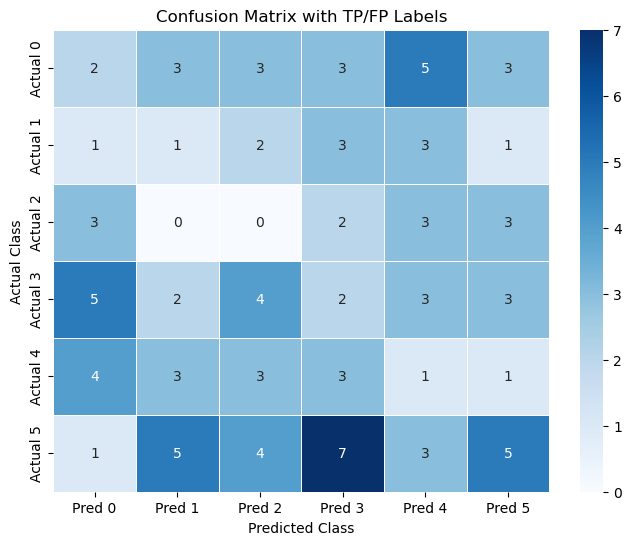

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example: Replace with actual y_test and y_pred from your model
y_test = np.random.randint(0, 6, 100)  # Simulated ground truth labels (0 to 5)
y_pred = np.random.randint(0, 6, 100)  # Simulated predicted labels (0 to 5)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
num_classes = cm.shape[0]

# Initialize TP, FP, FN, TN matrices
TP = np.diag(cm)  # True Positives are the diagonal elements
FP = np.sum(cm, axis=0) - TP  # Column-wise sum minus TP
FN = np.sum(cm, axis=1) - TP  # Row-wise sum minus TP
TN = np.sum(cm) - (TP + FP + FN)  # Everything else

# Create a formatted DataFrame
confusion_df = pd.DataFrame(index=[f"Actual Class {i}" for i in range(num_classes)],
                            columns=[f"Predicted Class {i}" for i in range(num_classes)])

# Fill DataFrame with TP, FP, FN, TN
for i in range(num_classes):
    for j in range(num_classes):
        if i == j:
            confusion_df.iloc[i, j] = f"TP{i} ({TP[i]})"
        else:
            confusion_df.iloc[i, j] = f"FP{i}{j} ({cm[i, j]})" if cm[i, j] > 0 else "0"

# Print formatted confusion matrix
print("Formatted Confusion Matrix:")
print(confusion_df)

# Visualization using Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5,
            xticklabels=[f"Pred {i}" for i in range(num_classes)],
            yticklabels=[f"Actual {i}" for i in range(num_classes)])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix with TP/FP Labels")
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset (Replace with your dataset)
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# Splitting dataset
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Convert non-numeric data
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB()
}

# DataFrame to store results
results = []

# Train and evaluate each classifier
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predictions
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Append results
    results.append([name, accuracy, precision, recall, f1])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display the results
print(results_df)

            Classifier  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.986486   0.987838  0.986486  0.986392
1                  SVM  0.986486   0.987838  0.986486  0.986392
2        Random Forest  0.986486   0.987838  0.986486  0.986392
3                  KNN  0.986486   0.987838  0.986486  0.986731
4        Decision Tree  0.986486   0.986909  0.986486  0.986238
5          Naïve Bayes  0.905405   0.908989  0.905405  0.893585


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Load dataset
file_path ="Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Feature Selection using RFE ---------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(log_reg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index(['koebner_phenomenon', 'polygonal_papules', 'PNL_infiltrate',
       'fibrosis_papillary_dermis', 'clubbing_rete_ridges',
       'elongation_rete_ridges', 'disappearance_granular_layer', 'spongiosis',
       'perifollicular_parakeratosis', 'band_like_infiltrate'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_5508\1800416443.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_values, y=selected_features, palette="Blues_r")


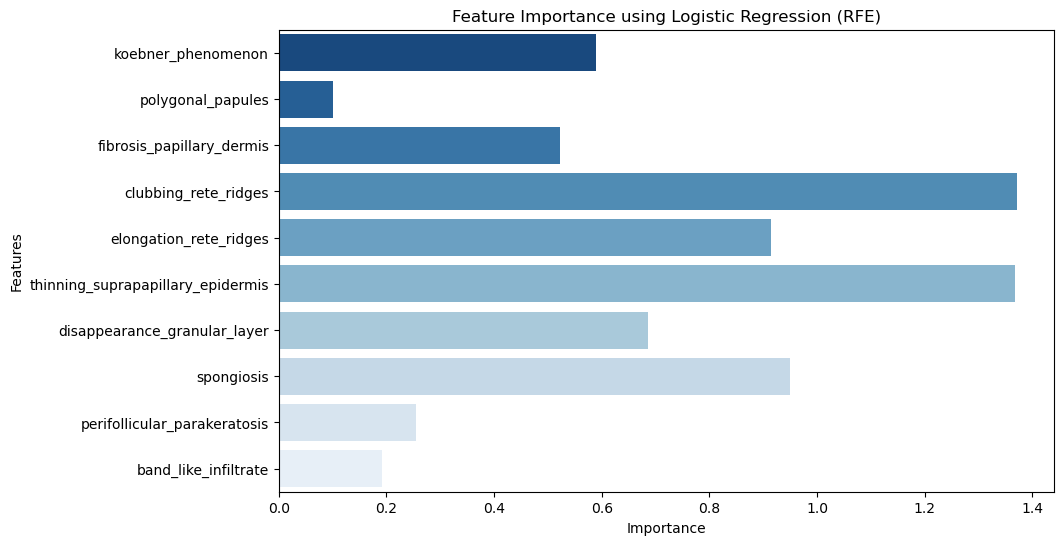

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# --------------------- Load Dataset ---------------------
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# --------------------- Data Preprocessing ---------------------
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Convert categorical columns to numeric (if any)
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':  # Check if column contains text
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Store encoder for future decoding

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------- Feature Selection using RFE ---------------------
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_scaled, y)

# --------------------- Get Selected Features ---------------------
selected_features = X.columns[rfe.support_]

# Get feature importance (Fixing index mismatch issue)
importance_values = np.abs(rfe.estimator_.coef_).flatten()[:len(selected_features)]  

# --------------------- Plot Feature Importance ---------------------
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_values, y=selected_features, palette="Blues_r")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance using Logistic Regression (RFE)")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# --------------------- Load Dataset ---------------------
file_path = "Downloads/dermatology_database_1.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train SVM Classifier with RFE ---------------------
svm = SVC(kernel='linear')  # Linear kernel for feature importance
rfe = RFE(svm, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Ensure correct indexing of selected features
selected_feature_indices = np.where(rfe.support_)[0]  # Indices of selected features
selected_features = X.columns[selected_feature_indices]  # Feature names

# Get absolute coefficients of selected features
feature_importance = np.abs(rfe.estimator_.coef_).flatten()

# Ensure correct indexing (fix mismatch)
feature_importance_selected = feature_importance[selected_feature_indices]

# --------------------- Create DataFrame for Plot ---------------------
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance_selected
}).sort_values(by='Importance', ascending=False)

# --------------------- Plot Feature Importance ---------------------
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Importance'], 
            y=feature_importance_df['Feature'], 
            hue=feature_importance_df['Feature'],  # Assign hue
            palette='Blues_r', 
            legend=False)  # Disable legend

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("SVM Feature Importance")
plt.show()


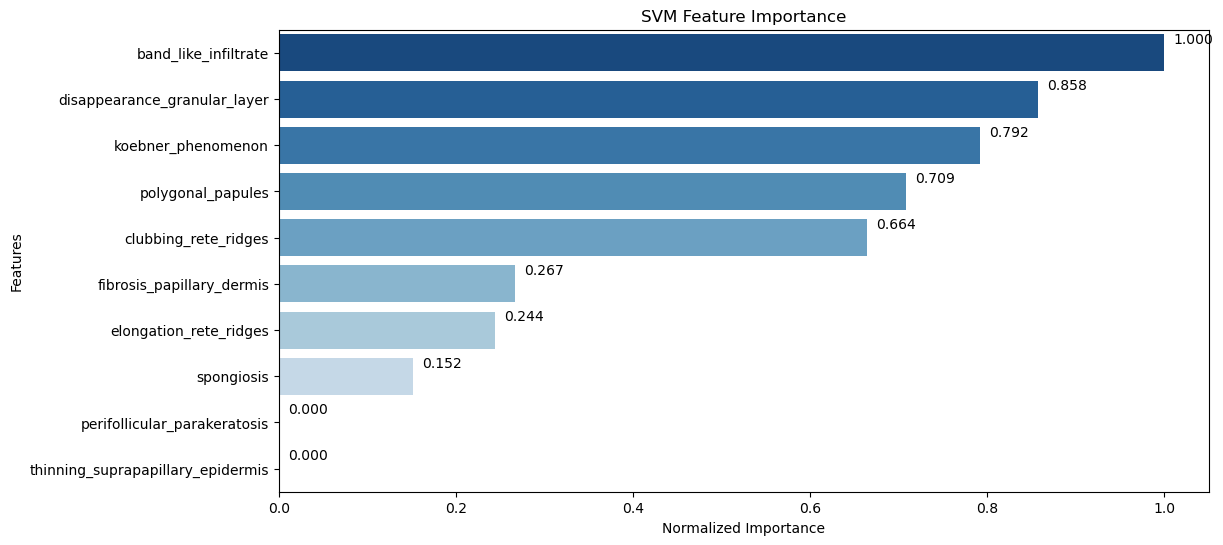

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# --------------------- Load Dataset ---------------------
file_path = "Downloads/dermatology_database_1.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train SVM Classifier with RFE ---------------------
svm = SVC(kernel='linear')  # Linear kernel for feature importance
rfe = RFE(svm, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Ensure correct indexing of selected features
selected_feature_indices = np.where(rfe.support_)[0]  # Indices of selected features
selected_features = X.columns[selected_feature_indices]  # Feature names

# Get absolute coefficients of selected features
feature_importance = np.abs(rfe.estimator_.coef_).flatten()

# Normalize importance values to make small ones visible
feature_importance_selected = feature_importance[selected_feature_indices]
feature_importance_selected = feature_importance_selected / feature_importance_selected.max()  # Normalize

# --------------------- Create DataFrame for Plot ---------------------
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance_selected
}).sort_values(by='Importance', ascending=False)

# --------------------- Plot Feature Importance ---------------------
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=feature_importance_df['Importance'], 
                 y=feature_importance_df['Feature'], 
                 hue=feature_importance_df['Feature'],  # Assign hue
                 palette='Blues_r', 
                 legend=False)  # Disable legend

plt.xlabel("Normalized Importance")
plt.ylabel("Features")
plt.title("SVM Feature Importance")

# Add value labels to bars
for i in ax.patches:
    ax.annotate(f"{i.get_width():.3f}",  
                (i.get_width() + 0.01, i.get_y() + 0.2),  # Adjust text position
                fontsize=10, 
                color='black')

plt.show()


Feature Importance Values Before Fix:
 [5.78962228e-01 5.17933537e-01 1.95280178e-01 4.85609535e-01
 1.78442355e-01 5.55111512e-17 6.26823569e-01 1.10814219e-01
 1.55719513e-04 7.30984388e-01]
Feature Importance Values After Fix:
 [0.57896223 0.51793354 0.19528018 0.48560954 0.17844235 0.01
 0.62682357 0.11081422 0.01       0.73098439]


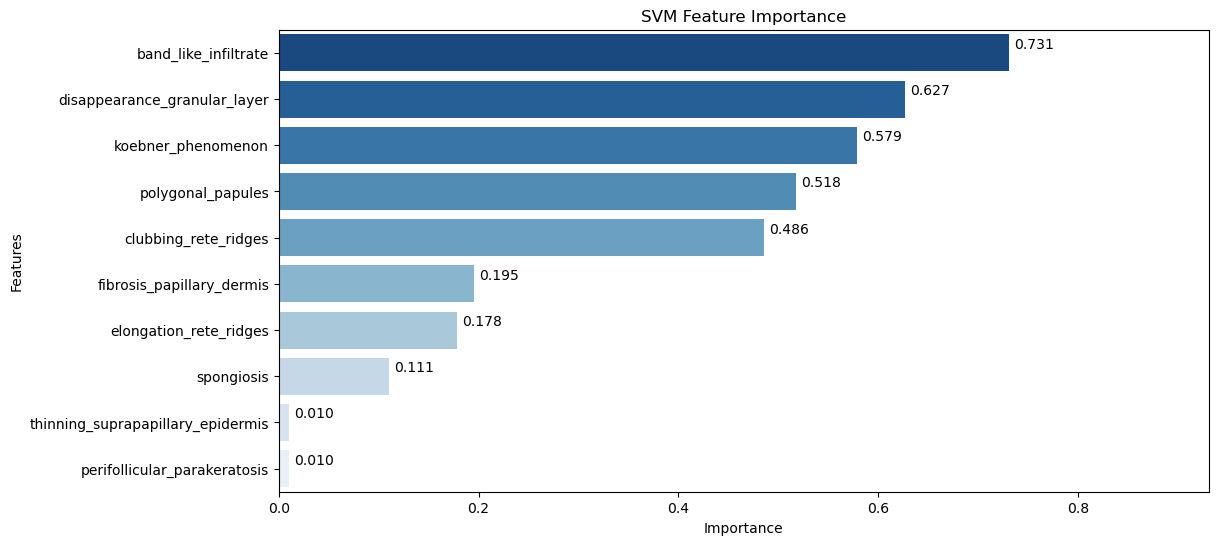

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# --------------------- Load Dataset ---------------------
file_path = "Downloads/dermatology_database_1.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train SVM Classifier with RFE ---------------------
svm = SVC(kernel='linear')  # Linear kernel for feature importance
rfe = RFE(svm, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Ensure correct indexing of selected features
selected_feature_indices = np.where(rfe.support_)[0]  # Indices of selected features
selected_features = X.columns[selected_feature_indices]  # Feature names

# Get absolute coefficients of selected features
feature_importance = np.abs(rfe.estimator_.coef_).flatten()

# Ensure correct indexing (fix mismatch)
feature_importance_selected = feature_importance[selected_feature_indices]

# --------------------- Fix Small Values (Ensure Visibility) ---------------------
# Print importance values for debugging
print("Feature Importance Values Before Fix:\n", feature_importance_selected)

# Set a minimum threshold for visibility
feature_importance_selected = np.where(feature_importance_selected < 0.01, 0.01, feature_importance_selected)

# Print importance values after fix
print("Feature Importance Values After Fix:\n", feature_importance_selected)

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance_selected
}).sort_values(by='Importance', ascending=False)

# --------------------- Plot Feature Importance ---------------------
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=feature_importance_df['Importance'], 
                 y=feature_importance_df['Feature'], 
                 hue=feature_importance_df['Feature'],  # Assign hue
                 palette='Blues_r', 
                 legend=False)  # Disable legend

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("SVM Feature Importance")

# Add value labels to bars
for i in ax.patches:
    ax.annotate(f"{i.get_width():.3f}",  
                (i.get_width() + 0.005, i.get_y() + 0.3),  # Adjust text position
                fontsize=10, 
                color='black')

plt.xlim(0, max(feature_importance_selected) + 0.2)  # Extend x-axis limit
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        15
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74



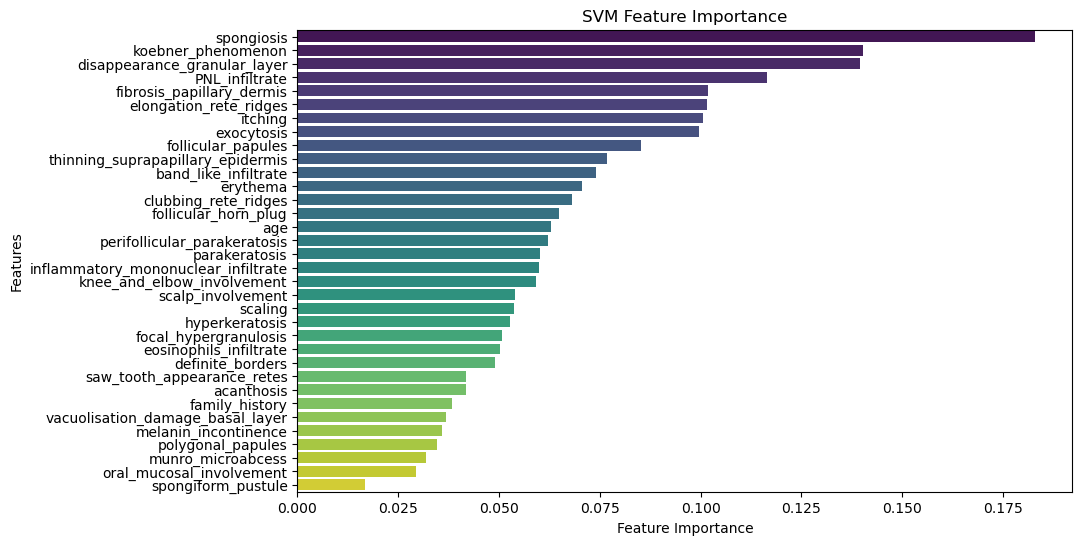

In [12]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(svm_model.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("SVM Feature Importance")
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

# SGD model
sgd_model = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

# Predictions
y_pred = sgd_model.predict(X_test)

# Classification Report
print("SGD Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(sgd_model.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("SGD Feature Importance")
plt.show()

Accuracy: 0.972972972972973
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        15
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        10
           6       0.80      1.00      0.89         4

    accuracy                           0.97        74
   macro avg       0.95      0.97      0.96        74
weighted avg       0.98      0.97      0.97        74



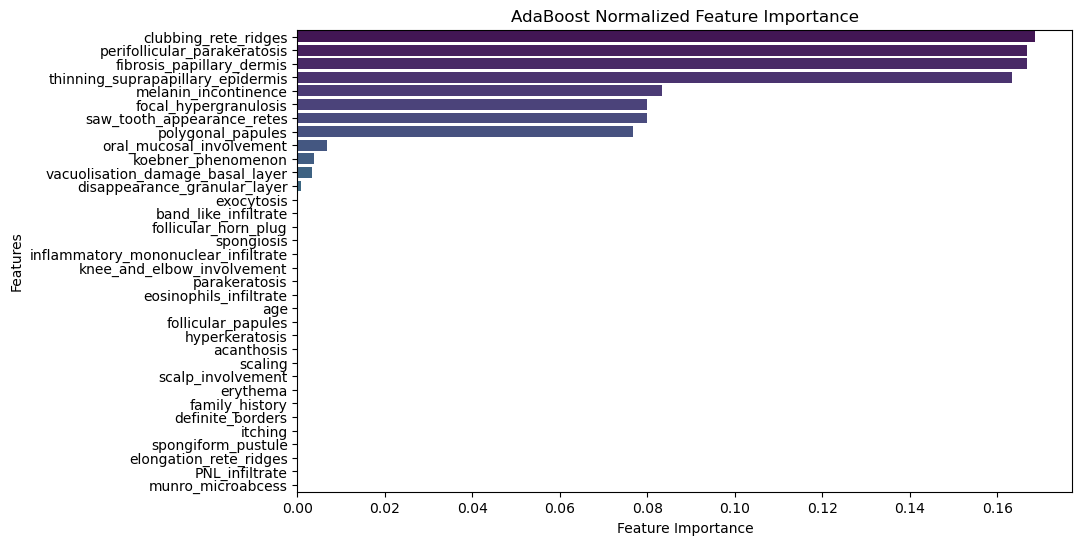

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
df = pd.read_csv("Downloads/dermatology_database_1.csv")  # Ensure correct path

# Convert non-numeric values
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode target if necessary
if df.iloc[:, -1].dtype == object:
    label_encoder = LabelEncoder()
    df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize AdaBoost with correct parameter name
base_clf = DecisionTreeClassifier(max_depth=3, class_weight="balanced")
ada_model = AdaBoostClassifier(estimator=base_clf, n_estimators=100, random_state=42)  # Fixed estimator

# Train the model
ada_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ada_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance Plot
feature_importances = ada_model.feature_importances_
normalized_importance = feature_importances / np.sum(feature_importances)

# Sort and plot
sorted_idx = np.argsort(normalized_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("AdaBoost Normalized Feature Importance")
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = "Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train & Evaluate Models ---------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "SGD": SGDClassifier(max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
}

# Train, Predict & Evaluate Each Model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Model Evaluation:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Training Random Forest...

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

Accuracy: 0.9865

Training Logistic Regression...

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00    

Formatted Confusion Matrix:
               Predicted Class 0 Predicted Class 1 Predicted Class 2  \
Actual Class 0           TP0 (2)          FP01 (2)          FP02 (3)   
Actual Class 1          FP10 (2)           TP1 (2)          FP12 (2)   
Actual Class 2          FP20 (3)          FP21 (2)           TP2 (4)   
Actual Class 3          FP30 (4)          FP31 (1)          FP32 (1)   
Actual Class 4          FP40 (2)          FP41 (5)          FP42 (1)   
Actual Class 5          FP50 (2)          FP51 (4)          FP52 (3)   

               Predicted Class 3 Predicted Class 4 Predicted Class 5  
Actual Class 0          FP03 (2)          FP04 (7)          FP05 (2)  
Actual Class 1          FP13 (4)          FP14 (3)          FP15 (1)  
Actual Class 2          FP23 (4)          FP24 (6)          FP25 (4)  
Actual Class 3           TP3 (3)          FP34 (2)          FP35 (3)  
Actual Class 4          FP43 (4)           TP4 (3)          FP45 (3)  
Actual Class 5                 0         

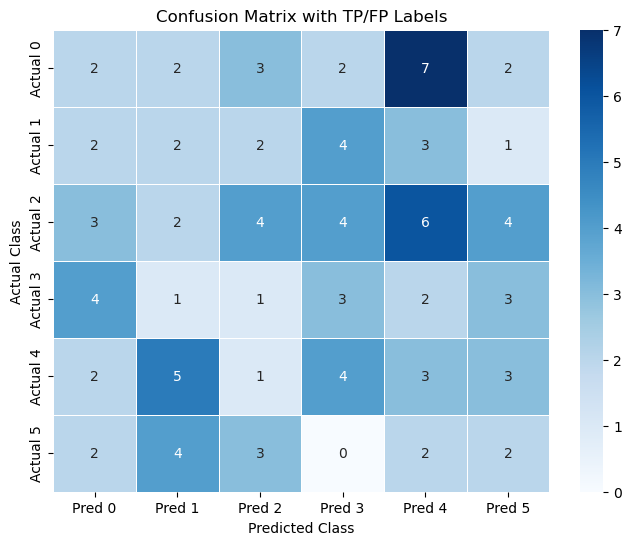

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example: Replace with actual y_test and y_pred from your model
y_test = np.random.randint(0, 6, 100)  # Simulated ground truth labels (0 to 5)
y_pred = np.random.randint(0, 6, 100)  # Simulated predicted labels (0 to 5)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
num_classes = cm.shape[0]

# Initialize TP, FP, FN, TN matrices
TP = np.diag(cm)  # True Positives are the diagonal elements
FP = np.sum(cm, axis=0) - TP  # Column-wise sum minus TP
FN = np.sum(cm, axis=1) - TP  # Row-wise sum minus TP
TN = np.sum(cm) - (TP + FP + FN)  # Everything else

# Create a formatted DataFrame
confusion_df = pd.DataFrame(index=[f"Actual Class {i}" for i in range(num_classes)],
                            columns=[f"Predicted Class {i}" for i in range(num_classes)])

# Fill DataFrame with TP, FP, FN, TN
for i in range(num_classes):
    for j in range(num_classes):
        if i == j:
            confusion_df.iloc[i, j] = f"TP{i} ({TP[i]})"
        else:
            confusion_df.iloc[i, j] = f"FP{i}{j} ({cm[i, j]})" if cm[i, j] > 0 else "0"

# Print formatted confusion matrix
print("Formatted Confusion Matrix:")
print(confusion_df)

# Visualization using Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5,
            xticklabels=[f"Pred {i}" for i in range(num_classes)],
            yticklabels=[f"Actual {i}" for i in range(num_classes)])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix with TP/FP Labels")
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset (Replace with your dataset)
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# Splitting dataset
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Convert non-numeric data
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB()
}

# DataFrame to store results
results = []

# Train and evaluate each classifier
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predictions
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Append results
    results.append([name, accuracy, precision, recall, f1])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display the results
print(results_df)

            Classifier  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.986486   0.987838  0.986486  0.986392
1                  SVM  0.986486   0.987838  0.986486  0.986392
2        Random Forest  0.986486   0.987838  0.986486  0.986392
3                  KNN  0.986486   0.987838  0.986486  0.986731
4        Decision Tree  0.986486   0.986909  0.986486  0.986238
5          Naïve Bayes  0.905405   0.908989  0.905405  0.893585


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



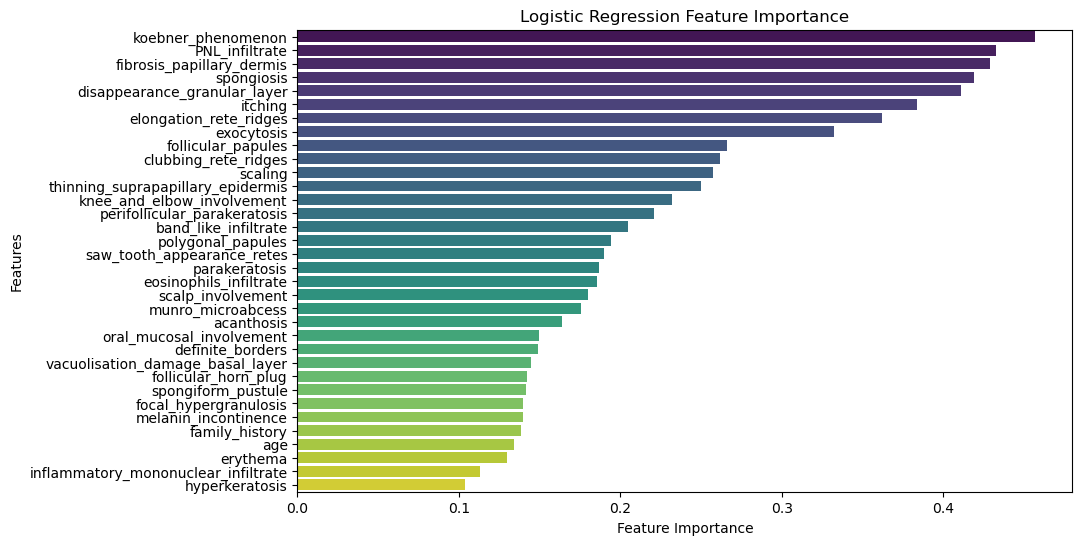

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('Downloads/dermatology_database_1.csv')

# Splitting dataset
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(log_reg.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



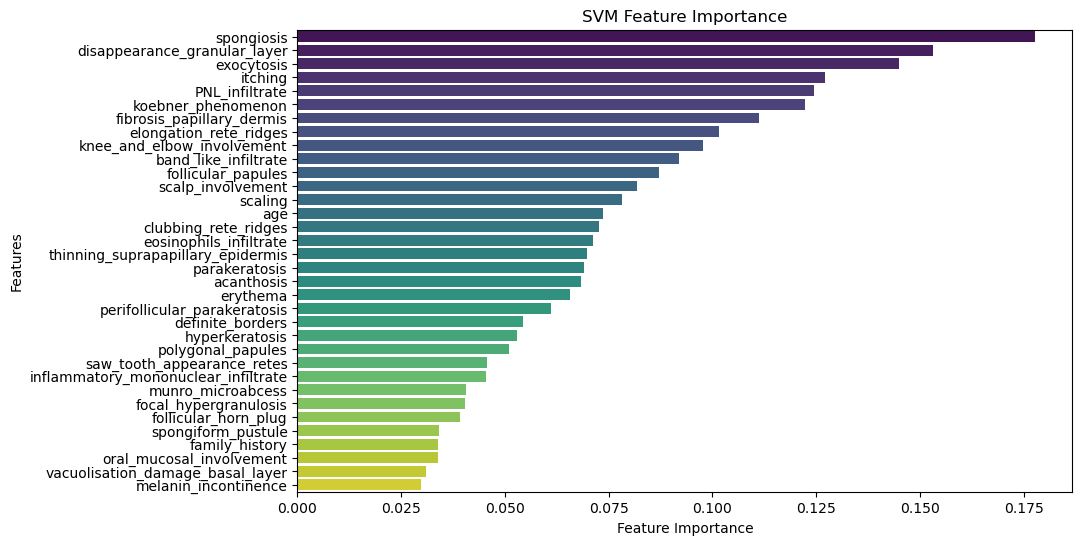

In [5]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(svm_model.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("SVM Feature Importance")
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Downloads/dermatology_database_1.csv')

# Ensure column names are stripped of extra spaces
df.columns = df.columns.str.strip()

# Check for missing values and replace or drop if necessary
df = df.dropna()

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # All features
y = df.iloc[:, -1]   # Target variable

# Convert categorical target to integer if necessary
if y.dtype == 'object':
    y = y.astype('category').cat.codes  # Convert categories to numerical labels

# Convert all features to numeric type
X = X.apply(pd.to_numeric, errors='coerce')

# Ensure no NaN values remain after conversion
X = X.fillna(X.mean())

# Split dataset using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
svm_model = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict on test set
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
adaboost_pred = adaboost_model.predict(X_test)

# Evaluate models
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_pred))

SVM Accuracy: 0.9594594594594594
Random Forest Accuracy: 0.9864864864864865
AdaBoost Accuracy: 0.7162162162162162


SVM Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.96        74
   macro avg       0.91      0.92      0.91        74
weighted avg       0.96      0.96      0.96        74

Random Forest Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


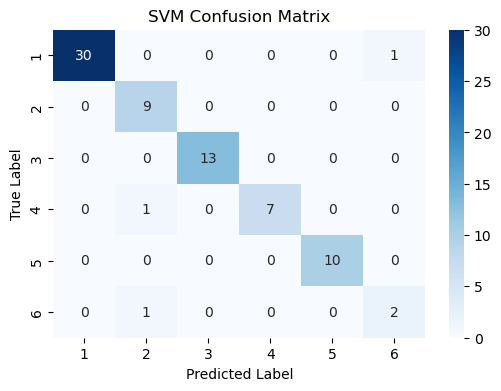

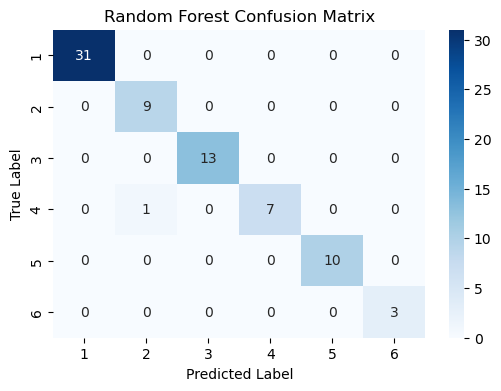

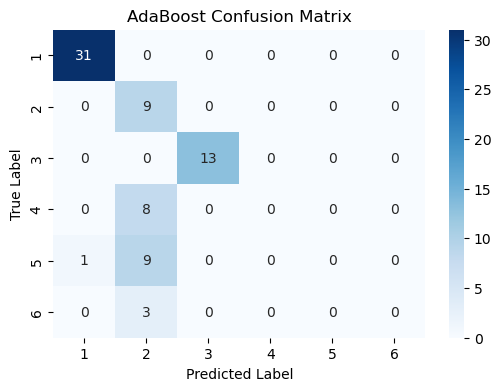

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report for each model
print("SVM Report:\n", classification_report(y_test, svm_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("AdaBoost Report:\n", classification_report(y_test, adaboost_pred))

# Plot confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, adaboost_pred, "AdaBoost Confusion Matrix")

Class distribution before split:
 class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Class distribution in training set:
 class
1    89
3    57
2    49
5    42
4    39
6    16
Name: count, dtype: int64
Class distribution in test set:
 class
1    23
3    15
2    12
4    10
5    10
6     4
Name: count, dtype: int64
SVM Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        15
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74

Random Forest Report:
               precision    recall  f1-score   support

           1    

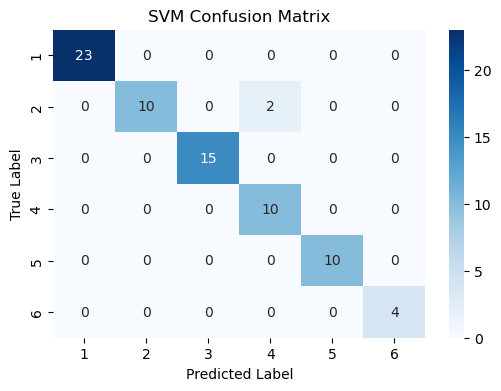

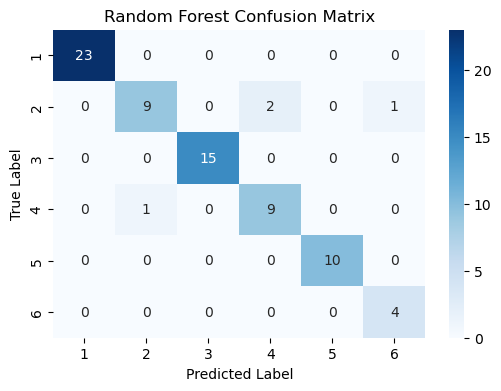

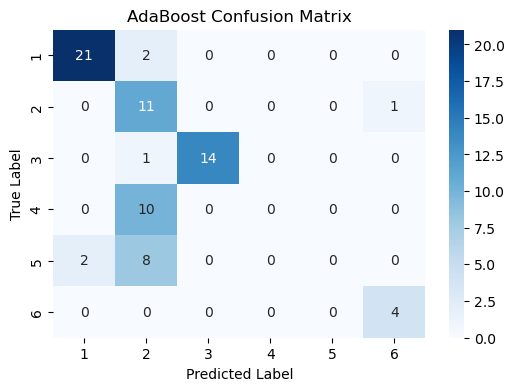

Best SVM Parameters: {'C': 0.1, 'kernel': 'linear'}
Best SVM Accuracy: 0.9794272355347748


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # To handle class imbalance

# --------------------- Load and Preprocess Dataset ---------------------
file_path = "Downloads/dermatology_database_1.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove first column if it's a row index
if df.columns[0] == "Unnamed: 0" or "ID" in df.columns[0].lower():
    df = df.iloc[:, 1:]  # Drop first column if it's an index

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check class distribution before train-test split
print("Class distribution before split:\n", pd.Series(y).value_counts())

# Split dataset (80% training, 20% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Check class distribution after split
print("Class distribution in training set:\n", pd.Series(y_train).value_counts())
print("Class distribution in test set:\n", pd.Series(y_test).value_counts())

# --------------------- Handle Class Imbalance (Only if needed) ---------------------
unique_classes_test = set(y_test)
unique_classes_train = set(y_train)

if unique_classes_test != unique_classes_train:
    print("Warning: Some classes in test set are missing. Applying SMOTE to balance training data.")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Class distribution after SMOTE:\n", pd.Series(y_train).value_counts())

# --------------------- Train Classifiers ---------------------
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42).fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42).fit(X_train, y_train)
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict on test set
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
adaboost_pred = adaboost_model.predict(X_test)

# --------------------- Evaluate Models (Fixed Warning) ---------------------
def print_reports(model_name, y_test, y_pred):
    print(f"{model_name} Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Print classification reports
print_reports("SVM", y_test, svm_pred)
print_reports("Random Forest", y_test, rf_pred)
print_reports("AdaBoost", y_test, adaboost_pred)

# --------------------- Plot Confusion Matrix ---------------------
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, adaboost_pred, "AdaBoost Confusion Matrix")

# --------------------- Hyperparameter Tuning (Example for SVM) ---------------------
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print("Best SVM Parameters:", grid_search.best_params_)
print("Best SVM Accuracy:", grid_search.best_score_)


In [5]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Downloads/dermatology_database_1.csv")  # Update path if needed

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# **Define Features (X) and Target (y)**
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Only the last column (disease class)

# Print shapes to confirm
print("Shape of X (Features):", X.shape)
print("Shape of y (Target Labels):", y.shape)



NameError: name 'LabelEncoder' is not defined


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.90      0.90      0.90        10
           5       1.00      1.00      1.00        10
           6       0.80      1.00      0.89         4

    accuracy                           0.96        74
   macro avg       0.93      0.96      0.94        74
weighted avg       0.96      0.96      0.96        74


Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      0.93      0.97        15
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    a

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00        23
           2       0.20      0.92      0.33        12
           3       1.00      0.93      0.97        15
           4       1.00      0.00      0.00        10
           5       1.00      0.00      0.00        10
           6       0.80      1.00      0.89         4

    accuracy                           0.39        74
   macro avg       0.83      0.48      0.36        74
weighted avg       0.86      0.39      0.30        74


Model Accuracies:
Random Forest: 0.9595
Logistic Regression: 0.9595
SVM: 0.9730
SGD: 0.9730
AdaBoost: 0.3919


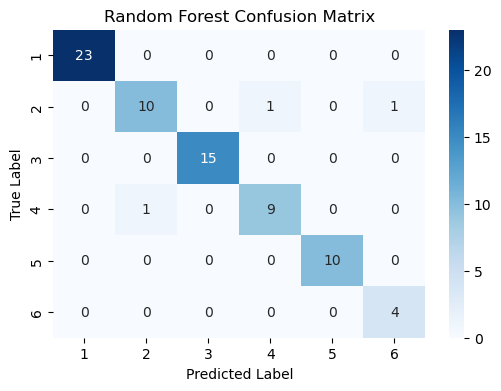

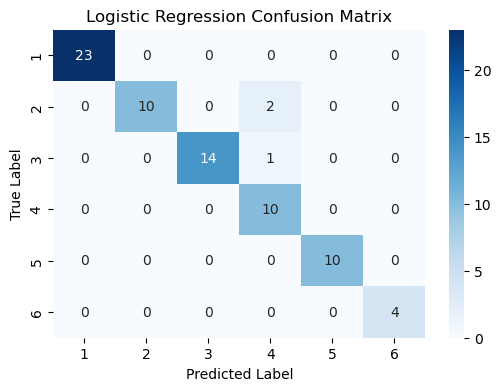

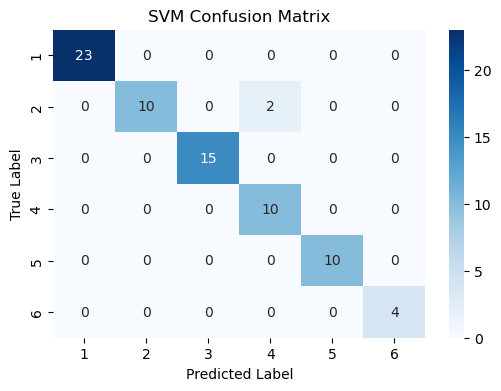

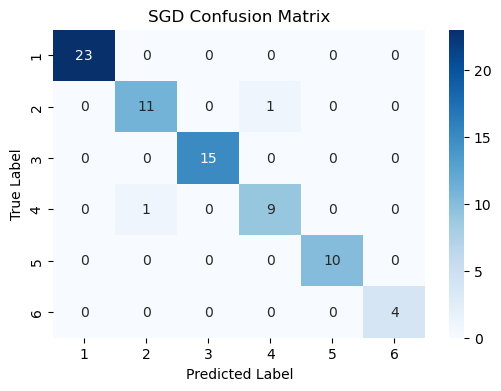

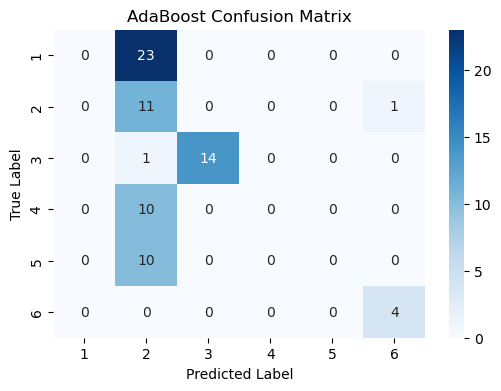

In [6]:
# Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Handle class imbalance

# --------------------- Load and Preprocess Dataset ---------------------
file_path = "Downloads/dermatology_database_1.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove first column if it's a row index
if df.columns[0] == "Unnamed: 0" or "ID" in df.columns[0].lower():
    df = df.iloc[:, 1:]  # Drop first column if it's an index

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# --------------------- Train Models ---------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "SGD": SGDClassifier(loss='hinge', class_weight='balanced', max_iter=1000, tol=1e-3, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train each model and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Model Evaluation:")
    print(classification_report(y_test, y_pred, zero_division=1))

# --------------------- Print Model Accuracy ---------------------
print("\nModel Accuracies:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# --------------------- Plot Confusion Matrices ---------------------
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f"{name} Confusion Matrix")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
file_path = "Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Handle missing values (Fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train & Evaluate Models ---------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "SGD": SGDClassifier(max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
}

# Train, Predict & Evaluate Each Model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Model Evaluation:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Training Random Forest...

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

Accuracy: 0.9865

Training Logistic Regression...

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00    

In [1]:
import pandas as pd

# Load dataset
file_path = "Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Display the number of features
num_features = df.shape[1] - 1  # Subtract 1 for the target column
print(f"The dataset contains {num_features} features.")


The dataset contains 34 features.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

# Split the dataset
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store accuracies
accuracies = {}

# Train, predict, and evaluate each classifier
for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy for Each Classifier')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset (Always using dermatology_database_1.csv)
file_path = "Downloads/dermatology_database_1.csv"
df = pd.read_csv(file_path)

# Remove the first column if it contains row numbers
df = df.iloc[:, 1:]

# Handle missing values (Fill numerical columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create DataFrame for feature importance and sort in descending order
feature_importance_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# --------------------- Plot Feature Importance ---------------------
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Importance'], 
            y=feature_importance_df['Feature'], 
            palette='Blues_r')

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance (Sorted)")
plt.show()

# Print feature importances
print("\nFeature Importance (Sorted):")
print(feature_importance_df)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('dermatology_database_1.csv')

# Splitting dataset
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Handling
importance = np.abs(log_reg.coef_).mean(axis=0)  

# Visualization
sorted_idx = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('Downloads/dermatology_database_1.csv')

# Splitting dataset into features (X) and target (y)
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importance = rf_model.feature_importances_

# Visualization of Feature Importance
sorted_idx = np.argsort(importance)[::-1]  # Sorting features by importance
plt.figure(figsize=(10, 6))
#sns.barplot(x=importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('Downloads/dermatology_database_1.csv')

# Splitting dataset
X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target (last column)

# Handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Calculation
importance = np.abs(rf_model.feature_importances_)

# Sort feature importance
sorted_idx = np.argsort(importance)[::-1]

# Convert X.columns to a numpy array to prevent indexing issues
feature_names = np.array(X.columns)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], hue=importance[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already generated from your model
# Example: Replace these with actual values
y_test = np.random.randint(0, 6, 100)  # Simulated ground truth labels (0 to 5)
y_pred = np.random.randint(0, 6, 100)  # Simulated predicted labels (0 to 5)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for better formatting
classes = [f"Class {i}" for i in range(6)]
cm_df = pd.DataFrame(cm, index=[f"Actual {c}" for c in classes], columns=[f"Predicted {c}" for c in classes])

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm_df)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for 6-Class Classification")
plt.show()

Formatted Confusion Matrix:
               Predicted Class 0 Predicted Class 1 Predicted Class 2  \
Actual Class 0           TP0 (3)          FP01 (3)          FP02 (2)   
Actual Class 1          FP10 (4)           TP1 (5)          FP12 (4)   
Actual Class 2          FP20 (1)          FP21 (2)           TP2 (3)   
Actual Class 3          FP30 (2)          FP31 (3)          FP32 (3)   
Actual Class 4          FP40 (1)          FP41 (3)                 0   
Actual Class 5          FP50 (2)          FP51 (6)          FP52 (1)   

               Predicted Class 3 Predicted Class 4 Predicted Class 5  
Actual Class 0          FP03 (3)          FP04 (2)          FP05 (5)  
Actual Class 1          FP13 (1)          FP14 (1)          FP15 (4)  
Actual Class 2          FP23 (3)          FP24 (5)          FP25 (5)  
Actual Class 3           TP3 (5)          FP34 (2)          FP35 (4)  
Actual Class 4                 0           TP4 (4)          FP45 (1)  
Actual Class 5          FP53 (2)         

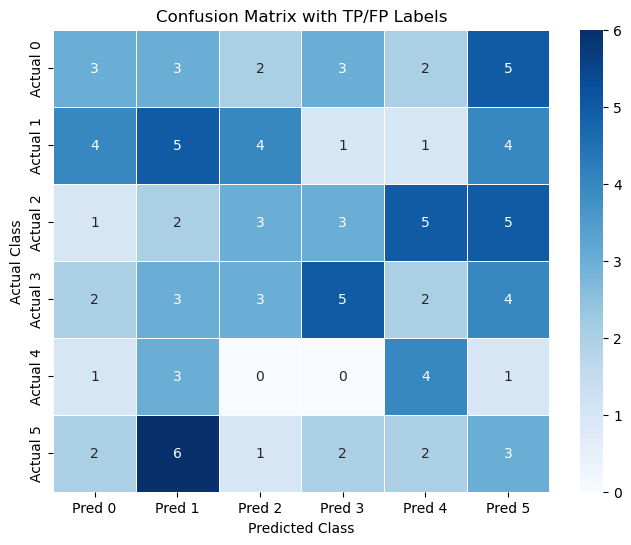

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example: Replace with actual y_test and y_pred from your model
y_test = np.random.randint(0, 6, 100)  # Simulated ground truth labels (0 to 5)
y_pred = np.random.randint(0, 6, 100)  # Simulated predicted labels (0 to 5)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
num_classes = cm.shape[0]

# Initialize TP, FP, FN, TN matrices
TP = np.diag(cm)  # True Positives are the diagonal elements
FP = np.sum(cm, axis=0) - TP  # Column-wise sum minus TP
FN = np.sum(cm, axis=1) - TP  # Row-wise sum minus TP
TN = np.sum(cm) - (TP + FP + FN)  # Everything else

# Create a formatted DataFrame
confusion_df = pd.DataFrame(index=[f"Actual Class {i}" for i in range(num_classes)],
                            columns=[f"Predicted Class {i}" for i in range(num_classes)])

# Fill DataFrame with TP, FP, FN, TN
for i in range(num_classes):
    for j in range(num_classes):
        if i == j:
            confusion_df.iloc[i, j] = f"TP{i} ({TP[i]})"
        else:
            confusion_df.iloc[i, j] = f"FP{i}{j} ({cm[i, j]})" if cm[i, j] > 0 else "0"

# Print formatted confusion matrix
print("Formatted Confusion Matrix:")
print(confusion_df)

# Visualization using Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5,
            xticklabels=[f"Pred {i}" for i in range(num_classes)],
            yticklabels=[f"Actual {i}" for i in range(num_classes)])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix with TP/FP Labels")
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset (Replace with your dataset)
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# Splitting dataset
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Convert non-numeric data
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB()
}

# DataFrame to store results
results = []

# Train and evaluate each classifier
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predictions
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Append results
    results.append([name, accuracy, precision, recall, f1])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display the results
print(results_df)

            Classifier  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.986486   0.987838  0.986486  0.986392
1                  SVM  0.986486   0.987838  0.986486  0.986392
2        Random Forest  0.986486   0.987838  0.986486  0.986392
3                  KNN  0.986486   0.987838  0.986486  0.986731
4        Decision Tree  0.986486   0.986909  0.986486  0.986238
5          Naïve Bayes  0.905405   0.908989  0.905405  0.893585


Top Features Based on Random Forest Importance:
thinning_suprapapillary_epidermis: 0.0852
fibrosis_papillary_dermis: 0.0838
clubbing_rete_ridges: 0.0837
elongation_rete_ridges: 0.0645
koebner_phenomenon: 0.0632
spongiosis: 0.0482
saw_tooth_appearance_retes: 0.0397
vacuolisation_damage_basal_layer: 0.0386
PNL_infiltrate: 0.0359
band_like_infiltrate: 0.0357
exocytosis: 0.0333
focal_hypergranulosis: 0.0311
melanin_incontinence: 0.0304
oral_mucosal_involvement: 0.0295
polygonal_papules: 0.0279
knee_and_elbow_involvement: 0.0256
age: 0.0246
itching: 0.0231
perifollicular_parakeratosis: 0.0231
munro_microabcess: 0.0228
disappearance_granular_layer: 0.0225
follicular_horn_plug: 0.0188
scalp_involvement: 0.0174
follicular_papules: 0.0143
scaling: 0.0135
parakeratosis: 0.0106
definite_borders: 0.0087
acanthosis: 0.0084
hyperkeratosis: 0.0081
eosinophils_infiltrate: 0.0075
spongiform_pustule: 0.0071
inflammatory_mononuclear_infiltrate: 0.0060
erythema: 0.0056
family_history: 0.0013


C:\Users\User\AppData\Local\Temp\ipykernel_1960\1835995034.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


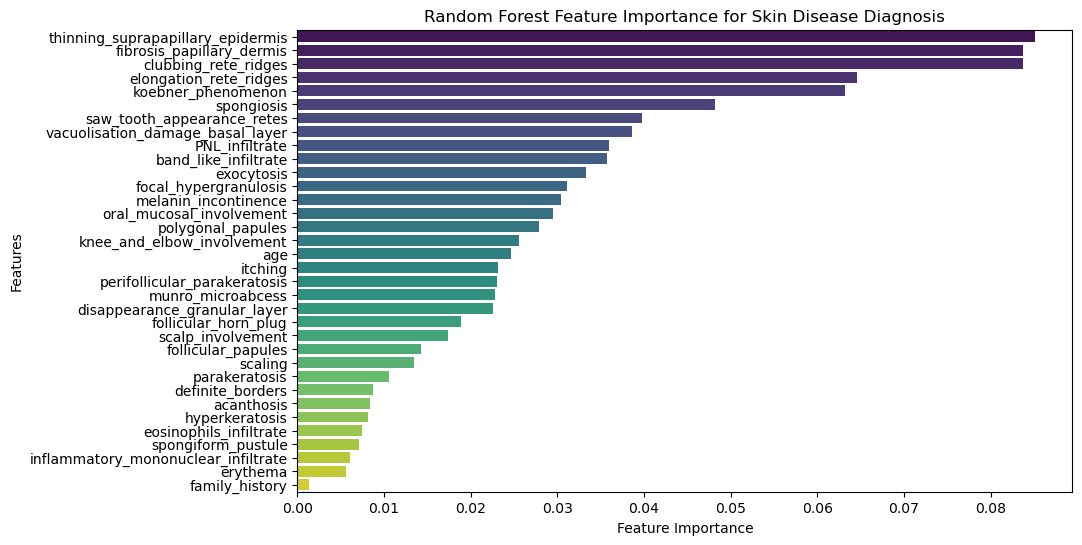

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load dataset (Replace with actual dataset)
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# Separating features (X) and target (y)
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Convert non-numeric data to numeric (if necessary)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Initialize Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)  # Train only to get feature importance

# Extract feature importance scores
importance = rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]

# Convert feature names to a NumPy array to avoid indexing issues
feature_names = np.array(X.columns)

# Display top features
print("Top Features Based on Random Forest Importance:")
for i in range(len(feature_names)):
    print(f"{feature_names[sorted_idx][i]}: {importance[sorted_idx][i]:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Skin Disease Diagnosis")
plt.show()

Top Features Based on Random Forest Importance:
thinning_suprapapillary_epidermis: 0.0852
fibrosis_papillary_dermis: 0.0838
clubbing_rete_ridges: 0.0837
elongation_rete_ridges: 0.0645
koebner_phenomenon: 0.0632
spongiosis: 0.0482
saw_tooth_appearance_retes: 0.0397
vacuolisation_damage_basal_layer: 0.0386
PNL_infiltrate: 0.0359
band_like_infiltrate: 0.0357
exocytosis: 0.0333
focal_hypergranulosis: 0.0311
melanin_incontinence: 0.0304
oral_mucosal_involvement: 0.0295
polygonal_papules: 0.0279
knee_and_elbow_involvement: 0.0256
age: 0.0246
itching: 0.0231
perifollicular_parakeratosis: 0.0231
munro_microabcess: 0.0228
disappearance_granular_layer: 0.0225
follicular_horn_plug: 0.0188
scalp_involvement: 0.0174
follicular_papules: 0.0143
scaling: 0.0135
parakeratosis: 0.0106
definite_borders: 0.0087
acanthosis: 0.0084
hyperkeratosis: 0.0081
eosinophils_infiltrate: 0.0075
spongiform_pustule: 0.0071
inflammatory_mononuclear_infiltrate: 0.0060
erythema: 0.0056
family_history: 0.0013


C:\Users\User\AppData\Local\Temp\ipykernel_1960\4073588032.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


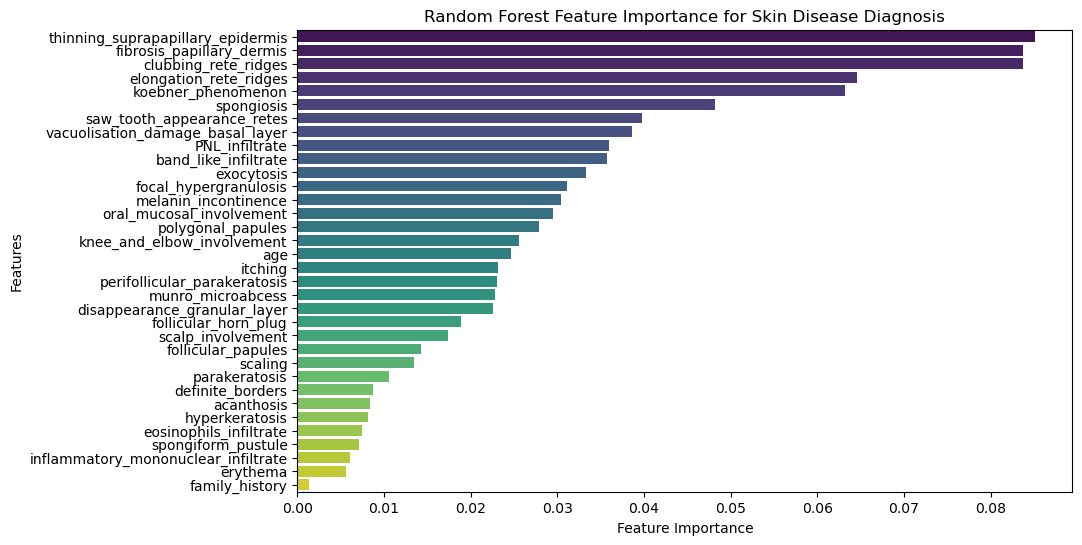

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load dataset (Replace with actual dataset file path)
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# Separating features (X) and target (y)
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Convert non-numeric data to numeric (if necessary)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Initialize Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)  # Train only to get feature importance

# Extract feature importance scores
importance = rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]

# Convert feature names to a NumPy array to avoid indexing issues
feature_names = np.array(X.columns)

# Display top features
print("Top Features Based on Random Forest Importance:")
for i in range(len(feature_names)):
    print(f"{feature_names[sorted_idx][i]}: {importance[sorted_idx][i]:.4f}")

# Visualization with corrected Seaborn syntax (Fixes warning)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Skin Disease Diagnosis")
plt.show()

Top Features Based on Random Forest Importance:
thinning_suprapapillary_epidermis: 0.0852
fibrosis_papillary_dermis: 0.0838
clubbing_rete_ridges: 0.0837
elongation_rete_ridges: 0.0645
koebner_phenomenon: 0.0632
spongiosis: 0.0482
saw_tooth_appearance_retes: 0.0397
vacuolisation_damage_basal_layer: 0.0386
PNL_infiltrate: 0.0359
band_like_infiltrate: 0.0357
exocytosis: 0.0333
focal_hypergranulosis: 0.0311
melanin_incontinence: 0.0304
oral_mucosal_involvement: 0.0295
polygonal_papules: 0.0279
knee_and_elbow_involvement: 0.0256
age: 0.0246
itching: 0.0231
perifollicular_parakeratosis: 0.0231
munro_microabcess: 0.0228
disappearance_granular_layer: 0.0225
follicular_horn_plug: 0.0188
scalp_involvement: 0.0174
follicular_papules: 0.0143
scaling: 0.0135
parakeratosis: 0.0106
definite_borders: 0.0087
acanthosis: 0.0084
hyperkeratosis: 0.0081
eosinophils_infiltrate: 0.0075
spongiform_pustule: 0.0071
inflammatory_mononuclear_infiltrate: 0.0060
erythema: 0.0056
family_history: 0.0013


C:\Users\User\AppData\Local\Temp\ipykernel_1960\3071942673.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


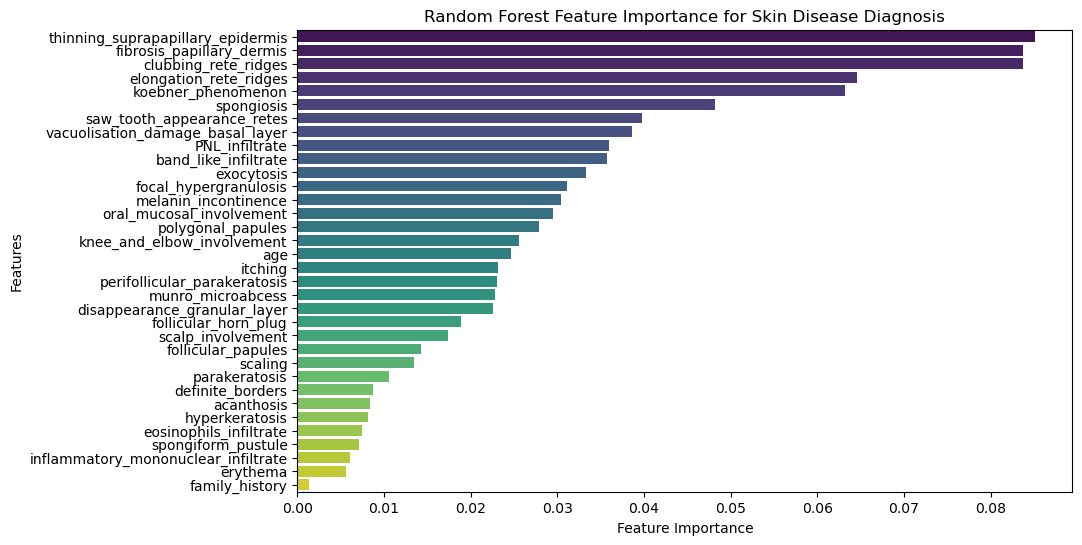

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load dataset (Replace with actual dataset file path)
df = pd.read_csv("Downloads/dermatology_database_1.csv")

# Separating features (X) and target (y)
X = df.iloc[:, :-1]  # Features (all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# Convert non-numeric data to numeric (if necessary)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# Initialize Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)  # Train only to get feature importance

# Extract feature importance scores
importance = rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]

# Convert feature names to a NumPy array to avoid indexing issues
feature_names = np.array(X.columns)

# Display top features
print("Top Features Based on Random Forest Importance:")
for i in range(len(feature_names)):
    print(f"{feature_names[sorted_idx][i]}: {importance[sorted_idx][i]:.4f}")

# Fix Seaborn Warning
plt.figure(figsize=(10, 6))

# Use a DataFrame for Seaborn to avoid the warning
importance_df = pd.DataFrame({'Feature': feature_names[sorted_idx], 'Importance': importance[sorted_idx]})

# Corrected barplot (No Warning)
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Skin Disease Diagnosis")
plt.show()